## Train Test Split and Model Training

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load data from BigQuery
import sys
sys.path.append('../Data')
from bigquery_loader import load_cleaned_data

df = load_cleaned_data()

Loading cleaned data from BigQuery...


c:\Users\mtutu\MLOps_End_to_End_Classification\venv\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


✓ Loaded 21096 rows, 20 columns


In [2]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),18.75,53.15,0
1,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,56.00,0
2,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25,0
3,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,0
4,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.20,0


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn'], axis=1)
y = df['Churn'] 

In [7]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),18.75,53.15
1,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,56.00
2,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25
3,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85
4,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.20


In [8]:
y.value_counts()

Churn
0    15489
1     5607
Name: count, dtype: Int64

In [9]:
# Seperating the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,

((16876, 19), (4220, 19))

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            21096 non-null  object 
 1   SeniorCitizen     21096 non-null  Int64  
 2   Partner           21096 non-null  object 
 3   Dependents        21096 non-null  object 
 4   tenure            21096 non-null  Int64  
 5   PhoneService      21096 non-null  object 
 6   MultipleLines     21096 non-null  object 
 7   InternetService   21096 non-null  object 
 8   OnlineSecurity    21096 non-null  object 
 9   OnlineBackup      21096 non-null  object 
 10  DeviceProtection  21096 non-null  object 
 11  TechSupport       21096 non-null  object 
 12  StreamingTV       21096 non-null  object 
 13  StreamingMovies   21096 non-null  object 
 14  Contract          21096 non-null  object 
 15  PaperlessBilling  21096 non-null  object 
 16  PaymentMethod     21096 non-null  object

## Feature Scaling with OneHotEncoder and StandardScaler

In [11]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [12]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``f

In [13]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [14]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.442946,-0.872139,-0.644853,-0.788275
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.442946,-1.279616,-1.469462,-0.996594
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.442946,-0.749896,0.184734,-0.543363
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.257614,-1.279616,0.216259,-0.974157
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.442946,-0.505410,-0.016026,-0.442682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.442946,0.391038,-1.031440,-0.367221
16872,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,-0.442946,0.431786,0.883247,0.767236
16873,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.442946,-0.831391,-1.502646,-0.911813
16874,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.442946,-1.279616,-0.663104,-0.985861


In [15]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [16]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.95363428,
         0.99938869, -0.61253055],
       [ 1.        ,  0.        ,  0.        , ..., -1.15737257,
         0.18473422, -0.90048431],
       [ 0.        ,  1.        ,  1.        , ...,  0.06505718,
        -1.29524903, -0.60049475],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.5461577 ,
         0.02379434, -0.46149782],
       [ 0.        ,  1.        ,  1.        , ...,  0.67627205,
         0.44356538,  0.68349326],
       [ 0.        ,  1.        ,  0.        , ...,  1.04300097,
         0.02047599,  0.66909447]], shape=(4220, 30))

In [17]:
## Checking imbalance data 
y.value_counts()

Churn
0    15489
1     5607
Name: count, dtype: Int64

In [18]:
### Applying SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE (random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [20]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, min_samples_split=20),
    "Random Forest": RandomForestClassifier(max_depth=None, max_features='log2', min_samples_split=2, n_estimators=1000),
    "Gradient Boost": GradientBoostingClassifier(criterion='squared_error', loss='exponential', max_depth=8, min_samples_split=2, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(learning_rate=1, n_estimators=500)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

c:\Users\mtutu\MLOps_End_to_End_Classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Logistic Regression
Model performance for Training set
- Accuracy: 0.8057
- F1 score: 0.7991
- Precision: 0.6605
- Recall: 0.5417
- Roc Auc Score: 0.7210
----------------------------------
Model performance for Test set
- Accuracy: 0.8066
- F1 score: 0.7997
- Precision: 0.6820
- Recall: 0.5510
- Roc Auc Score: 0.7271


Decision Tree
Model performance for Training set
- Accuracy: 0.8360
- F1 score: 0.8312
- Precision: 0.7255
- Recall: 0.6086
- Roc Auc Score: 0.7631
----------------------------------
Model performance for Test set
- Accuracy: 0.8204
- F1 score: 0.8146
- Precision: 0.7090
- Recall: 0.5839
- Roc Auc Score: 0.7468


Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9951
- Recall: 0.9964
- Roc Auc Score: 0.9973
----------------------------------
Model performance for Test set
- Accuracy: 0.9884
- F1 score: 0.9884
- Precision: 0.9826
- Recall: 0.9749
- Roc Auc Score: 0.9842


Gradient Boost
Model performance for Training set

# Hyperparameter Tuning

In [22]:
# Logistic Regression
logistic_params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 500]
}

# Decision Tree
decision_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 8, 15, None, 10],
    "min_samples_split": [2, 8, 15, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

# Random Forest 
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

# Gradient Boosting
gradient_params = {
    "loss": ["log_loss", "exponential"],
    "criterion": ["friedman_mse", "squared_error"],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 8, 10]
}

# AdaBoost 
adaboost_params = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 1, 2]
    }

In [23]:
logistic_params

{'penalty': ['l1', 'l2'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [100, 200, 500]}

In [24]:
decision_params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [5, 8, 15, None, 10],
 'min_samples_split': [2, 8, 15, 20],
 'min_samples_leaf': [1, 2, 4, 8]}

In [25]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [27]:
gradient_params

{'loss': ['log_loss', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [3, 5, 8, 10]}

In [28]:
adaboost_params

{'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.01, 0.1, 1, 2]}

In [29]:
# Models list for Hyperparameter tuning (in the same order)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

grid_models = [
    ("Logistic Regression", LogisticRegression(), logistic_params),
    ("Decision Tree", DecisionTreeClassifier(), decision_params),
    ("Random Forest", RandomForestClassifier(), rf_params),
    ("Gradient Boost", GradientBoostingClassifier(), gradient_params),
    ("AdaBoost", AdaBoostClassifier(), adaboost_params)
 ]

In [30]:
grid_models

[('Logistic Regression',
  LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': [0.01, 0.1, 1, 10, 100],
   'solver': ['liblinear', 'saga'],
   'max_iter': [100, 200, 500]}),
 ('Decision Tree',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': [5, 8, 15, None, 10],
   'min_samples_split': [2, 8, 15, 20],
   'min_samples_leaf': [1, 2, 4, 8]}),
 ('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': ['sqrt', 'log2', None],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Gradient Boost',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [3, 5, 8, 10]}),
 ('AdaBoost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.01, 0.1, 1, 2]})]

In [31]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter tuning using GridSearchCV on balanced data
model_param = {}
for name, model, params in grid_models:
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,
        verbose=2,
        n_jobs=-1,
        error_score='raise'
    )
    grid.fit(X_train_balanced, y_train_balanced)
    model_param[name] = grid.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
---------------- Best Params for Logistic Regression -------------------
{'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
---------------- Best Params for Decision Tree -------------------
{'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
---------------- Best Params for Random Forest -------------------
{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000}
---------------- Best Params for Gradient Boost -------------------
{'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
---------------- Best Params for AdaBoost --------

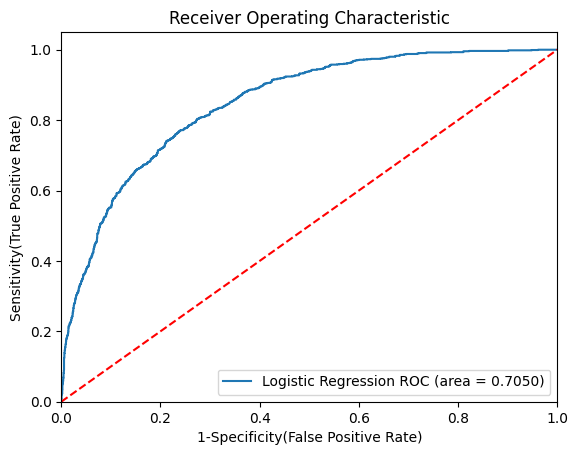

In [32]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga'),
    'auc': 0.7050
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.4f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

Top 10 Features by Importance (Absolute Coefficient):
                                          Feature  Coefficient  \
27                         StandardScaler__tenure    -1.340012   
21               OneHotEncoder__Contract_Two year    -1.252839   
6      OneHotEncoder__InternetService_Fiber optic     0.759237   
20               OneHotEncoder__Contract_One year    -0.669926   
29                   StandardScaler__TotalCharges     0.568861   
3                 OneHotEncoder__PhoneService_Yes    -0.530143   
15                 OneHotEncoder__TechSupport_Yes    -0.386686   
9               OneHotEncoder__OnlineSecurity_Yes    -0.342026   
24  OneHotEncoder__PaymentMethod_Electronic check     0.327107   
22            OneHotEncoder__PaperlessBilling_Yes     0.319488   

    Abs_Coefficient  
27         1.340012  
21         1.252839  
6          0.759237  
20         0.669926  
29         0.568861  
3          0.530143  
15         0.386686  
9          0.342026  
24         0.327107  

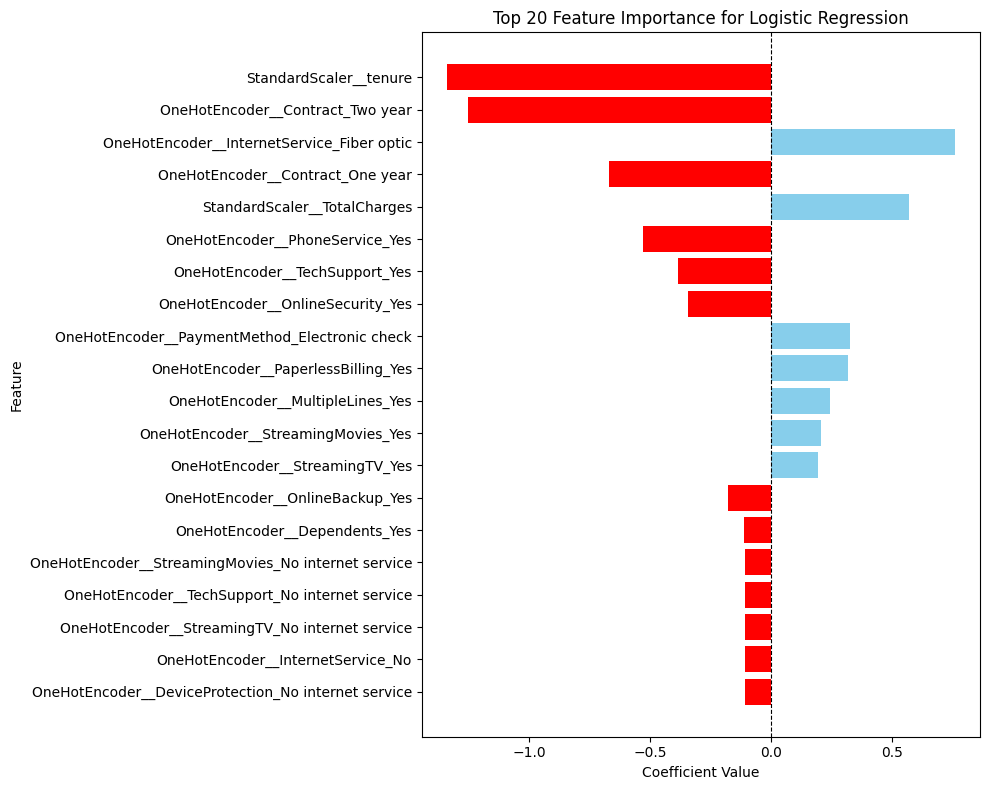

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Train the best Logistic Regression model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get coefficients (weights) from Logistic Regression
coefficients = best_model.coef_[0]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print top 10 features
print("Top 10 Features by Importance (Absolute Coefficient):")
print(importance_df.head(10))

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 8))
top_features = importance_df.head(top_n)
colors = ['red' if x < 0 else 'skyblue' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Feature Importance for Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

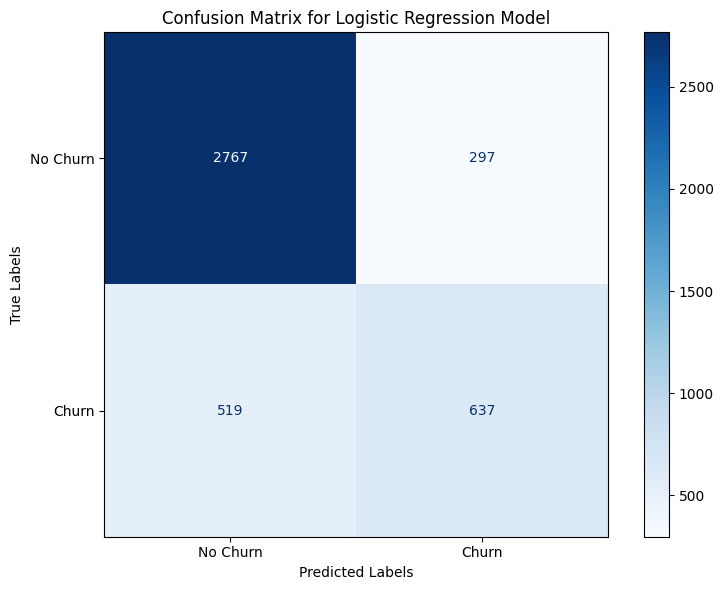


Confusion Matrix:
True Negatives: 2767
False Positives: 297
False Negatives: 519
True Positives: 637


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the best Logistic Regression model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)

# Generate predictions on test set
y_pred_test = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Print confusion matrix values
print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

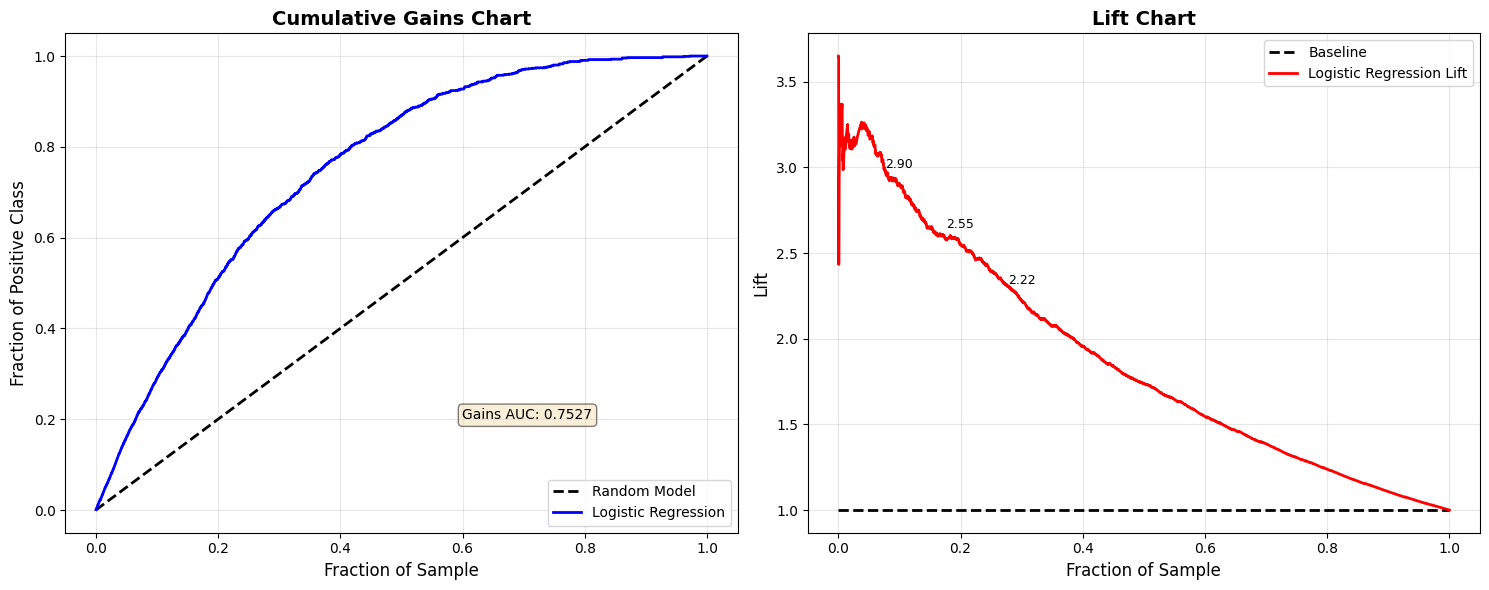


CUMULATIVE GAINS & LIFT ANALYSIS

Top 10% of customers:
  - Captures 29.07% of churners
  - Lift: 2.90x better than random

Top 20% of customers:
  - Captures 51.04% of churners
  - Lift: 2.55x better than random

Top 30% of customers:
  - Captures 66.70% of churners
  - Lift: 2.22x better than random


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Train the best Logistic Regression model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Create a dataframe with actual values and predicted probabilities
gains_df = pd.DataFrame({
    'actual': y_test,
    'predicted_proba': y_pred_proba
})

# Sort by predicted probability in descending order
gains_df = gains_df.sort_values('predicted_proba', ascending=False).reset_index(drop=True)

# Calculate cumulative values
gains_df['cumulative_data_fraction'] = (np.arange(len(gains_df)) + 1) / len(gains_df)
gains_df['cumulative_positive'] = gains_df['actual'].cumsum()
gains_df['cumulative_positive_fraction'] = gains_df['cumulative_positive'] / gains_df['actual'].sum()

# Calculate lift
total_positives = gains_df['actual'].sum()
total_samples = len(gains_df)
baseline = total_positives / total_samples
gains_df['lift'] = gains_df['cumulative_positive_fraction'] / gains_df['cumulative_data_fraction']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Cumulative Gains Chart
ax1.plot([0, 1], [0, 1], 'k--', label='Random Model', linewidth=2)
ax1.plot(gains_df['cumulative_data_fraction'], 
         gains_df['cumulative_positive_fraction'], 
         'b-', label='Logistic Regression', linewidth=2)
ax1.set_xlabel('Fraction of Sample', fontsize=12)
ax1.set_ylabel('Fraction of Positive Class', fontsize=12)
ax1.set_title('Cumulative Gains Chart', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Calculate gains area under curve
gains_auc = auc(gains_df['cumulative_data_fraction'], 
                gains_df['cumulative_positive_fraction'])
ax1.text(0.6, 0.2, f'Gains AUC: {gains_auc:.4f}', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Lift Chart
ax2.plot([0, 1], [1, 1], 'k--', label='Baseline', linewidth=2)
ax2.plot(gains_df['cumulative_data_fraction'], 
         gains_df['lift'], 
         'r-', label='Logistic Regression Lift', linewidth=2)
ax2.set_xlabel('Fraction of Sample', fontsize=12)
ax2.set_ylabel('Lift', fontsize=12)
ax2.set_title('Lift Chart', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Add lift value at different percentiles
for percentile in [0.1, 0.2, 0.3]:
    idx = int(percentile * len(gains_df))
    lift_value = gains_df.loc[idx, 'lift']
    ax2.text(percentile, lift_value + 0.1, f'{lift_value:.2f}', 
             fontsize=9, ha='center')

plt.tight_layout()
plt.savefig('cumulative_gains_lift_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key insights
print("\n" + "="*50)
print("CUMULATIVE GAINS & LIFT ANALYSIS")
print("="*50)
print(f"\nTop 10% of customers:")
idx_10 = int(0.1 * len(gains_df))
print(f"  - Captures {gains_df.loc[idx_10, 'cumulative_positive_fraction']:.2%} of churners")
print(f"  - Lift: {gains_df.loc[idx_10, 'lift']:.2f}x better than random")

print(f"\nTop 20% of customers:")
idx_20 = int(0.2 * len(gains_df))
print(f"  - Captures {gains_df.loc[idx_20, 'cumulative_positive_fraction']:.2%} of churners")
print(f"  - Lift: {gains_df.loc[idx_20, 'lift']:.2f}x better than random")

print(f"\nTop 30% of customers:")
idx_30 = int(0.3 * len(gains_df))
print(f"  - Captures {gains_df.loc[idx_30, 'cumulative_positive_fraction']:.2%} of churners")
print(f"  - Lift: {gains_df.loc[idx_30, 'lift']:.2f}x better than random")

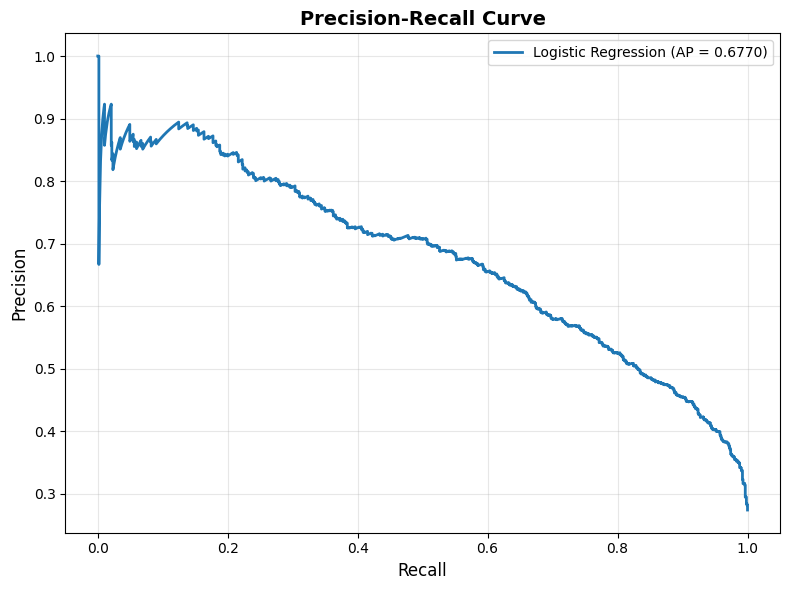

Average Precision Score: 0.6770


In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Train the best Logistic Regression model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2, label=f'Logistic Regression (AP = {avg_precision:.4f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('precision_recall_curve.png')
plt.show()

print(f"Average Precision Score: {avg_precision:.4f}")

In [37]:
from sklearn.metrics import classification_report

# Train and predict
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Generate classification report
print("="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      3064
       Churn       0.68      0.55      0.61      1156

    accuracy                           0.81      4220
   macro avg       0.76      0.73      0.74      4220
weighted avg       0.80      0.81      0.80      4220



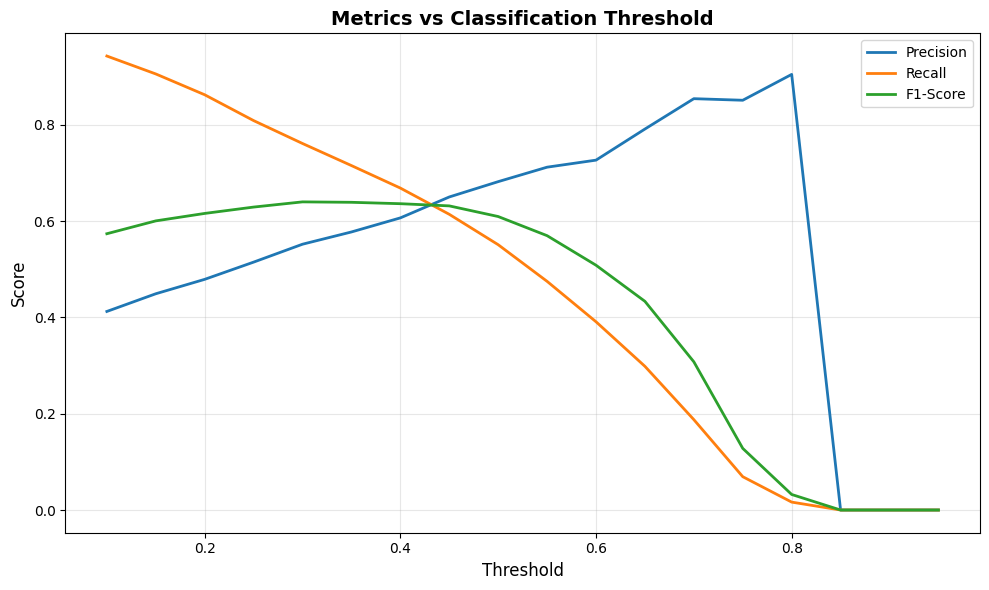

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Train model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Test different thresholds
thresholds = np.arange(0.1, 1.0, 0.05)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Metrics vs Classification Threshold', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('threshold_analysis.png')
plt.show()

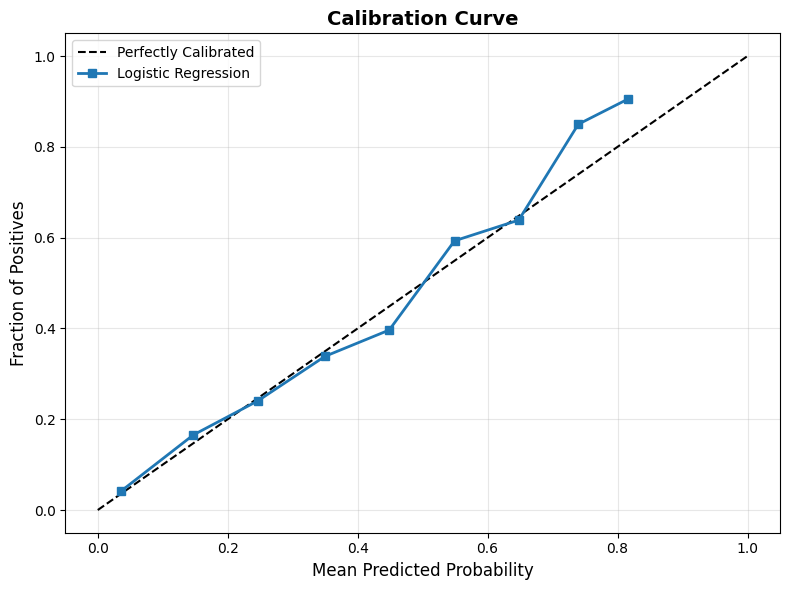

In [39]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Train model
best_model = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

# Plot
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.plot(mean_predicted_value, fraction_of_positives, 's-', linewidth=2, label='Logistic Regression')
plt.xlabel('Mean Predicted Probability', fontsize=12)
plt.ylabel('Fraction of Positives', fontsize=12)
plt.title('Calibration Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('calibration_curve.png')
plt.show()

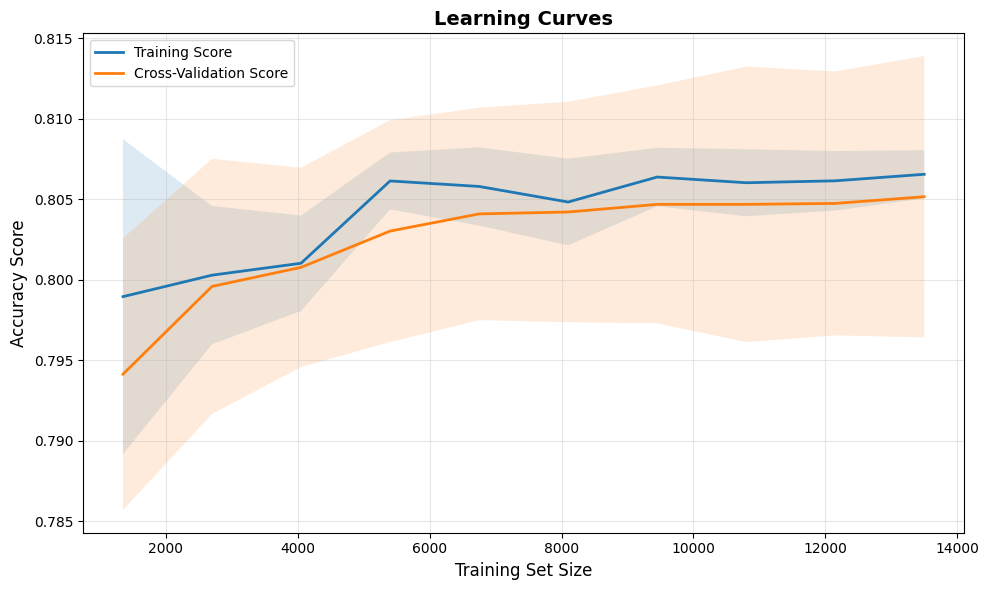

In [40]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga'),
    X_train, y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', linewidth=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Learning Curves', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curves.png')
plt.show()

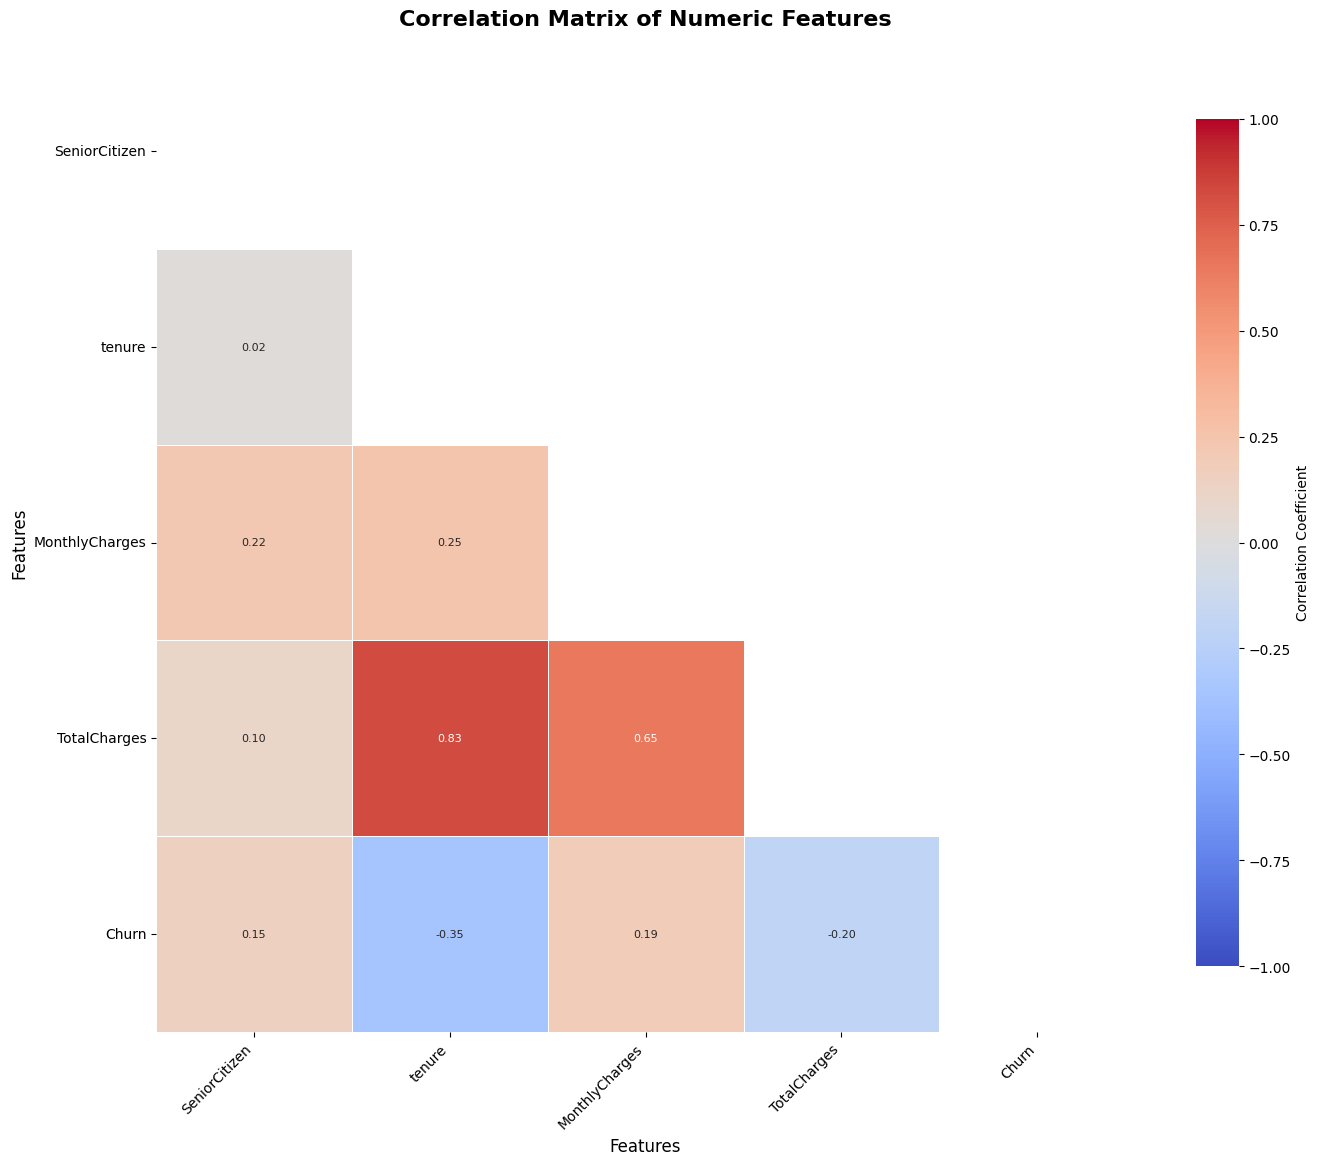


HIGHLY CORRELATED FEATURES (|correlation| > 0.7)
TotalCharges                   <-> tenure                         : +0.8259

CORRELATION WITH TARGET (Churn)
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


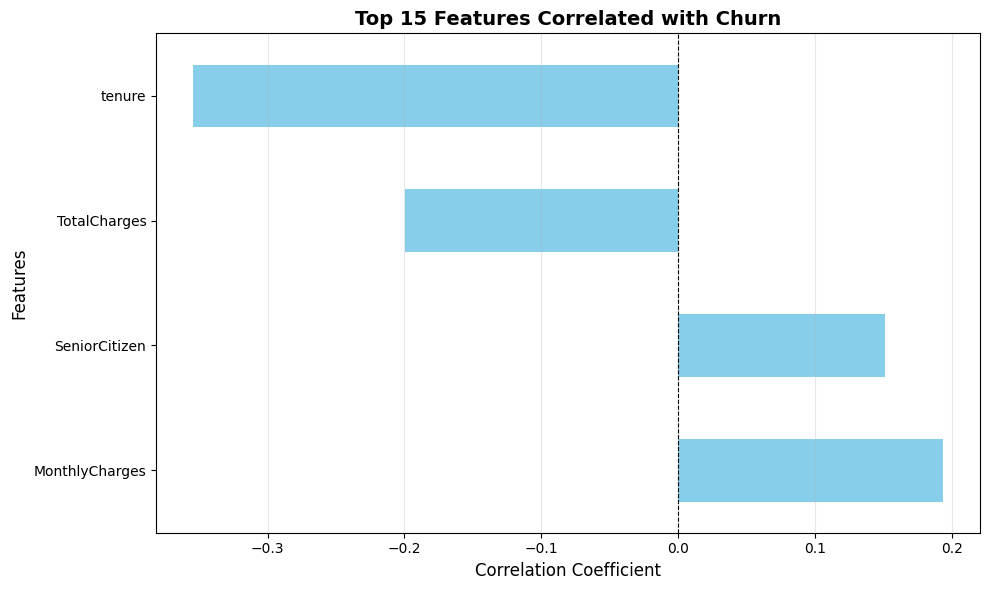

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter numeric columns only
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create figure with better sizing
plt.figure(figsize=(14, 12), dpi=100)

# Create mask for upper triangle (optional - shows only lower half)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with improved styling
sns.heatmap(
    corr_matrix,
    mask=mask,  # Remove this line if you want full matrix
    annot=True,
    fmt='.2f',  # 2 decimal places
    cmap='coolwarm',  # Better color scheme for correlation
    center=0,  # Center colormap at 0
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    vmin=-1,  # Set min value
    vmax=1,   # Set max value
    annot_kws={"size": 8}  # Adjust annotation font size
)

plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print highly correlated features (correlation > 0.7 or < -0.7)
print("\n" + "="*60)
print("HIGHLY CORRELATED FEATURES (|correlation| > 0.7)")
print("="*60)

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
high_corr = [(column, row, upper_tri.loc[row, column]) 
             for column in upper_tri.columns 
             for row in upper_tri.index 
             if abs(upper_tri.loc[row, column]) > 0.7]

if high_corr:
    for feat1, feat2, corr_val in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
        print(f"{feat1:30s} <-> {feat2:30s} : {corr_val:+.4f}")
else:
    print("No highly correlated feature pairs found.")

# Optional: Show correlation with target variable only
print("\n" + "="*60)
print("CORRELATION WITH TARGET (Churn)")
print("="*60)
if 'Churn' in numeric_data.columns:
    churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
    print(churn_corr)
    
    # Plot top correlations with target
    plt.figure(figsize=(10, 6))
    churn_corr.head(15).plot(kind='barh', color='skyblue')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 15 Features Correlated with Churn', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('churn_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()